# HW 5

This assignment covers several aspects of Logistic Regresstion & KNN Classifier. 
**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* Follow [README.md](README.md) for homework submission instructions


## Tutorials
    
* [KNN model creation](https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a)

* [Example of KNN](https://github.com/a-martyn/ISL-python/blob/master/Notebooks/ch4_classification_applied.ipynb)

* [KNN with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

* [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

* [Plot Confursion Matrix with Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

# 1. CLASSIFICATION USING KNN ALGORITHM

**Data** Get the exploratory data and the folowwing files:      
```http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/```
* Link contains the original data and the metadata both
* copy them in your HW folder

* If you are using command line: 
```>> wget http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat```
  * If wget is not working 
    * dowload it from [link](https://eternallybored.org/misc/wget/) 
    * follow [steps](https://stackoverflow.com/questions/29113456/wget-not-recognized-as-internal-or-external-command)

**Q1**
use pandas to read heart.dat
* NOTE : use separator as space while reading this data
* Use column names from metadata in given order
* NOTE : YOU WON'T SEE 'PRESENCE' in metadata (in attribute information)


**A1**
Replace the ? mark with your answer

In [1]:
import pandas as pd

columns = ['age','sex','chest pain type','resting blood pressure','serum cholestoral in mg/dl',
           'fasting blood sugar > 120 mg/dl','resting electrocardiographic results','max heart rate acheived',
           'exercise induced angina','oldpeak','slope of the peak exercise ST segment',
           'number of major vessels colored by flourosopy','thal','presence']

df = pd.read_csv('heart.dat',names=columns, na_values = "?", comment='\t',sep=" ", skipinitialspace=True)

**Q2**
1. Have a look at head and tail of your data
* N.B: You can use .tail and .head methods
* N.B: Print both of them, if you just run ```without printing``` only output from last command will be printed
2. Let us view the size of dataset as well
* print data shape
3. Now let us see if there is some missing value
4. If there is any na values drop it


**A2** Replace ??? with code in the code cell below

In [2]:
# Code goes below
df.head()

df.tail()

df.shape

df.info()

#df.?? no na values to drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   age                                            270 non-null    float64
 1   sex                                            270 non-null    float64
 2   chest pain type                                270 non-null    float64
 3   resting blood pressure                         270 non-null    float64
 4   serum cholestoral in mg/dl                     270 non-null    float64
 5   fasting blood sugar > 120 mg/dl                270 non-null    float64
 6   resting electrocardiographic results           270 non-null    float64
 7   max heart rate acheived                        270 non-null    float64
 8   exercise induced angina                        270 non-null    float64
 9   oldpeak                                        270 non

**Q3** Now we will look deeper into the dataset
* Use pairplot from sns to plot this data frame
* See the statistics of the data by describing dataframe

**A3** Replace ??? with code in the code cell below

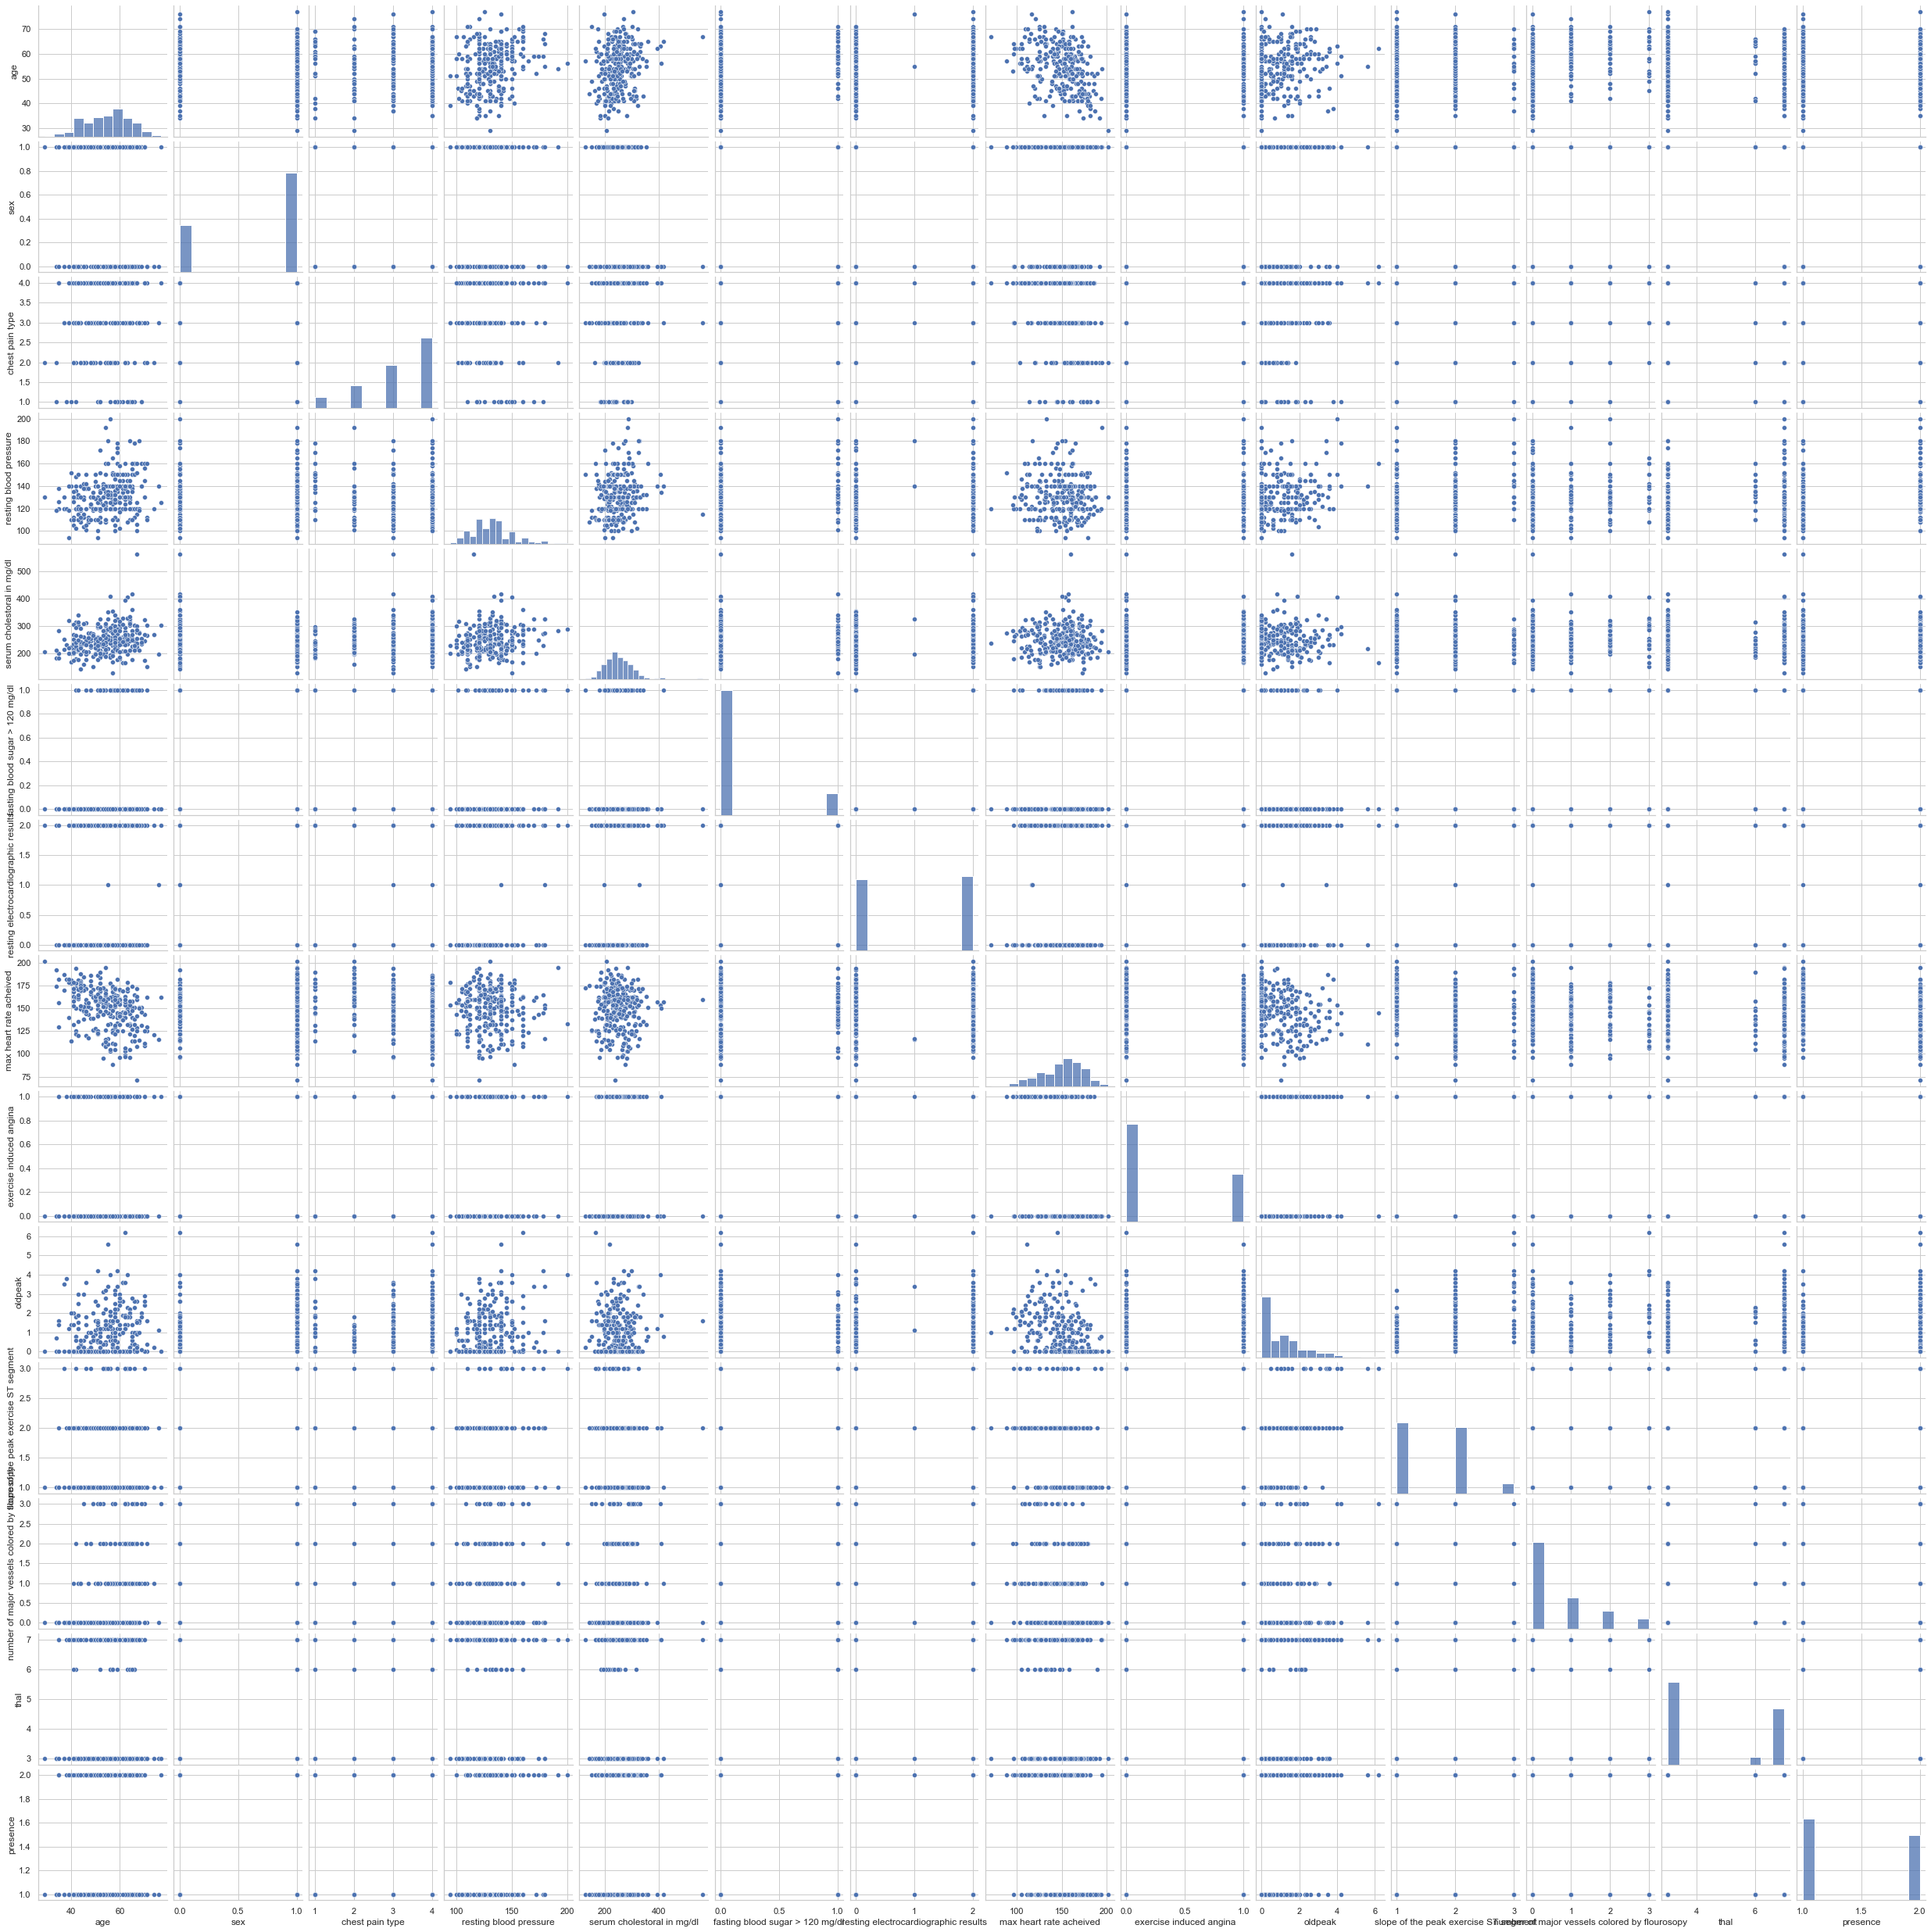

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,max heart rate acheived,exercise induced angina,oldpeak,slope of the peak exercise ST segment,number of major vessels colored by flourosopy,thal,presence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [3]:
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)
g = sns.pairplot(df)

import matplotlib.pyplot as plt
plt.show(g)

#describe dataframe
df.describe()

**Q4** If you go through metadata (Attribute Information:) you will see that all data in our dataframe are not of same types.
* So we should deal them accordingly.  
* We don't have to do anything to 'real' data. However we have to deal with ordered data and nominal data  
* We only need to convert all nominal and ordered data to dummy variables 

**A4** Replace ??? with code in the code cell below


In [4]:

dummy_list = ['slope of the peak exercise ST segment','resting electrocardiographic results','chest pain type','thal']
df = pd.get_dummies(df, columns=dummy_list, prefix= "Attribute", prefix_sep='-')
df.head()

,age,sex,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,max heart rate acheived,exercise induced angina,oldpeak,number of major vessels colored by flourosopy,presence,...,Attribute-0.0,Attribute-1.0,Attribute-2.0,Attribute-1.0,Attribute-2.0,Attribute-3.0,Attribute-4.0,Attribute-3.0,Attribute-6.0,Attribute-7.0
0,70.0,1.0,130.0,322.0,0.0,109.0,0.0,2.4,3.0,2,...,0,0,1,0,0,0,1,1,0,0
1,67.0,0.0,115.0,564.0,0.0,160.0,0.0,1.6,0.0,1,...,0,0,1,0,0,1,0,0,0,1
2,57.0,1.0,124.0,261.0,0.0,141.0,0.0,0.3,0.0,2,...,1,0,0,0,1,0,0,0,0,1
3,64.0,1.0,128.0,263.0,0.0,105.0,1.0,0.2,1.0,1,...,1,0,0,0,0,0,1,0,0,1
4,74.0,0.0,120.0,269.0,0.0,121.0,1.0,0.2,1.0,1,...,0,0,1,0,1,0,0,1,0,0


## KNN Model from sklearn

**Q5** Get training data from the dataframe
1. Assign values of ```presence``` column to y, note you have to use .values method
2. Drop 'presence' column from data frame,
3. Assign df values to x

Split dataset into train and test data use train_test_split
1. Use stratify = y and test_size = 0.2 and random_state = 1
2. Create a KNN model using sklearn library, ```Initialize n_neighbors = 3```, ```(See the documenttaion for details)```
3. Fit the model with the train data 

**A5** Replace ??? with code in the code cell below

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Assign values of ```presence``` column to y, note you have to use .values method
y = df['presence'].values
#Drop 'presence' column from data frame,
df.drop(columns='presence', inplace=True)
# Assign df values to x
x = df.values
# View shape of x and y
x.shape, y.shape

# Use stratify = y and test_size = 0.2 and random_state = 1
xtrain, xtest, ytrain, ytest = train_test_split(x,y, stratify=y, test_size=.2, random_state=1)

# Create a KNN model using sklearn library, k=3 
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model with the train data
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

**Q6** 
_Analysis_
* Predict xtest and view first 25 predicitons
* Compare prediction with real ytest 25 predictions
* Print the score with test data

The way we fit the dataset is not good  
_Normalization_
* rescale only real value columns
* For each column normalize ```df[col] as (x - mean) / standard_deviation```

**A6** Replace ??? with code in the code cell below

In [6]:
#  Predict xtest and view first 25 predicitons
print(knn.predict(xtest)[:25])

# Compare prediction with real ytest 25 predictions
print(ytest[:25])

# Print the score with test data
print(knn.score(xtest, ytest))

#rescale only real value columns
realcols = ['age','resting blood pressure','serum cholestoral in mg/dl','max heart rate acheived','oldpeak',
            'number of major vessels colored by flourosopy']

# For each column normalize ```df[col] as (x - mean) / standard_deviation```
for col in realcols:
  mean = df[col].mean()
  std = df[col].std()
  df[col] = (df[col]-mean)/std

[2 2 1 1 1 2 1 1 2 2 2 1 1 1 2 1 1 2 1 1 2 1 1 1 1]
[2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1 2 2 1 1 1]
0.7222222222222222


**Q7** Write the code to train new model using KNN classifier, n=3 (same as above)

**A7** Replace ??? with code in the code cell below

In [7]:
# update x
x = df.values

# Train test Split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, stratify=y, test_size=.2, random_state=1)

# Model Initialization
knn = KNeighborsClassifier(n_neighbors=3)

# Model fitting with training data
knn.fit(xtrain, ytrain)

# Now print score on test data
knn.score(xtest, ytest)

0.8703703703703703

**Q8** Lets analyze the difference between two modeling strategies (data normalization)  Compare score with and without data normalization process and explain

**A8**  
The score without normalization is 0.72 and with normalization is 0.87. Normalization provides a higher mean accuracy in this case because it creates a common scale, deletes duplicates, and makes the data more effective for processing.

**Q9** Now we will write a function that will initialize, fit and return score on test data for given values of k and Plot result  

1. Use values from 1 to 25(inclusive) and get score and plot as a bar graph
* Hint : For advance method you can use map (recall functional programming from last exercise) or you can use simple loops

2. Finally you can print the best value of k by getting the index   
* N.B: Note index starts with 0 but values of k starts with 1 so actual value of k will be 1 more  
* You can use ```np.argmax()``` function  

3. Now define your best model as bestknn and print score

**A9** Write the code below (replace??)

[0.7777777777777778, 0.7592592592592593, 0.8703703703703703, 0.8888888888888888, 0.9444444444444444, 0.9259259259259259, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9074074074074074, 0.9259259259259259, 0.9074074074074074, 0.9259259259259259, 0.9074074074074074]
BESt VALUE OF K 5
[[29  1]
 [ 2 22]]


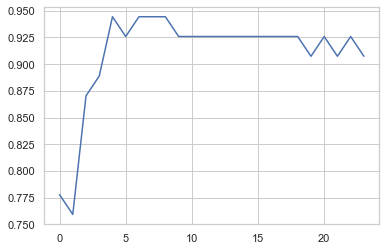

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def returnScore(k, xtrain, xtest, ytrain, ytest):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain, ytrain)
  return knn.score(xtest, ytest)


result = [*map(lambda i:returnScore(i, xtrain, xtest, ytrain, ytest), range(1,25))]
print(result)
plt.plot(result)


print('BESt VALUE OF K',np.argmax(result) + 1 )


bestknn = KNeighborsClassifier(n_neighbors=np.argmax(result) + 1)

bestknn.fit(xtrain, ytrain)
bestknn.score(xtest, ytest)


ypred = bestknn.predict(xtest)
matrix = confusion_matrix(ytest, ypred)
print(matrix)

**Q10** Now we will plot the confusion matrix from the above matrix information

* Please review following examples in documentation plot confusion plots
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

**A10** Replace ??? with code in the code cell below

Text(0.5, 1.0, 'Confusion matrix')

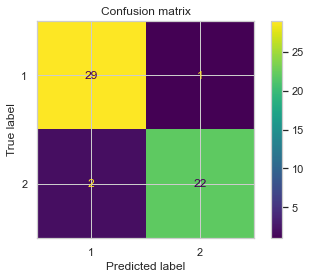

In [9]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(bestknn,xtest,ytest)
disp.ax_.set_title("Confusion matrix")